### Atividade de algoritmo de classificação

##### Luiz Nagata RA: 210553
##### Jéssica Nagata RA: 210552
##### Nicoli Carvalho RA: 210341

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
#loading dataset
dados = pd.read_csv("HBAT - KNN.csv")
dados

,Unnamed: 0,id,x1,x2_original,x2,x3_original,x3,x4_original,x4,x5_original,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1,1,1 to 5 years,Magazine industry,0,Large (500+),1,Outside North America,0,Direct to customer,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
1,2,2,Over 5 years,Newsprint industry,1,Small (0 to 499),0,USA/North America,1,Indirect through broker,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
2,3,3,Over 5 years,Magazine industry,0,Large (500+),1,Outside North America,0,Direct to customer,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
3,4,4,Less than 1 year,Newsprint industry,1,Large (500+),1,Outside North America,0,Indirect through broker,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
4,5,5,1 to 5 years,Magazine industry,0,Large (500+),1,USA/North America,1,Direct to customer,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96,Less than 1 year,Newsprint industry,1,Small (0 to 499),0,USA/North America,1,Direct to customer,...,5.8,3.6,4.9,3.6,3.6,7.3,8.1,8.1,50.1,"Yes, would consider"
96,97,97,Less than 1 year,Magazine industry,0,Small (0 to 499),0,Outside North America,0,Direct to customer,...,4.5,6.4,4.2,5.6,3.7,6.3,5.5,7.2,48.1,"No, would not consider"
97,98,98,Less than 1 year,Magazine industry,0,Small (0 to 499),0,USA/North America,1,Direct to customer,...,5.0,4.3,3.1,2.9,2.5,5.4,7.0,7.7,51.1,"No, would not consider"
98,99,99,1 to 5 years,Newsprint industry,1,Small (0 to 499),0,Outside North America,0,Direct to customer,...,6.0,5.7,4.3,4.9,3.9,6.4,7.1,7.4,61.1,"No, would not consider"


## Considerando x2

#### Dividindo x e y

In [14]:
inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
x = dados[inputs]
y = dados['x2']

#### Separando bases de Treinamento e Teste, segundo um critério: 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Rodar KNN

In [36]:
acuracia = []
presicao = []
sensibilidade = []
f1Score = []

for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Acurácia
    acuracia = acuracia + [accuracy_score(y_test, y_pred)]
    
    #Precisão
    presicao = presicao + [precision_score(y_test, y_pred)]
    
    #Sensibilidade
    sensibilidade = sensibilidade + [recall_score(y_test, y_pred)]
    
    #F1 Score
    f1Score = f1Score + [f1_score(y_test, y_pred)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

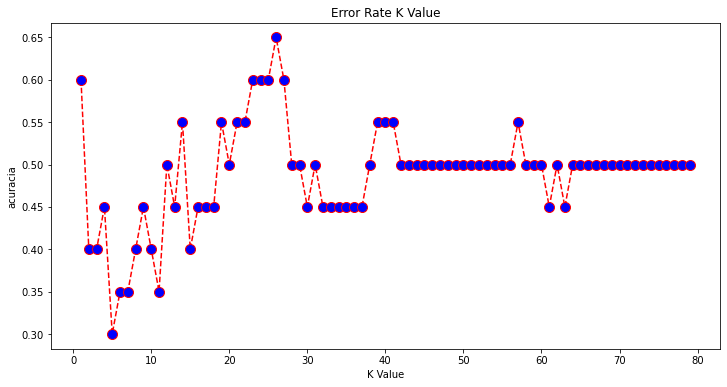

In [38]:
# Gráfico Acuracia
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), acuracia, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('acuracia')  
plt.show()

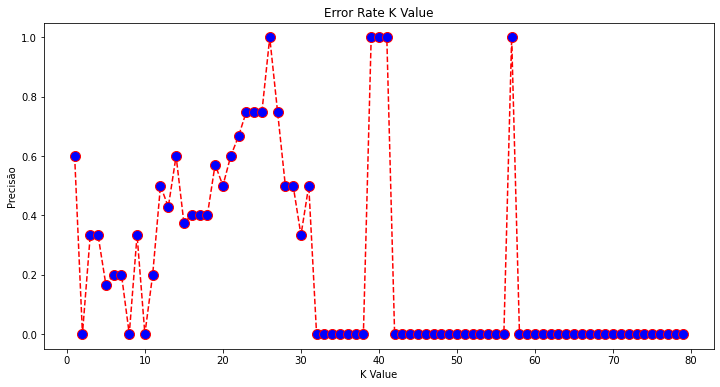

In [40]:
# Gráfico Precisão
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), presicao, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Precisão')  
plt.show()

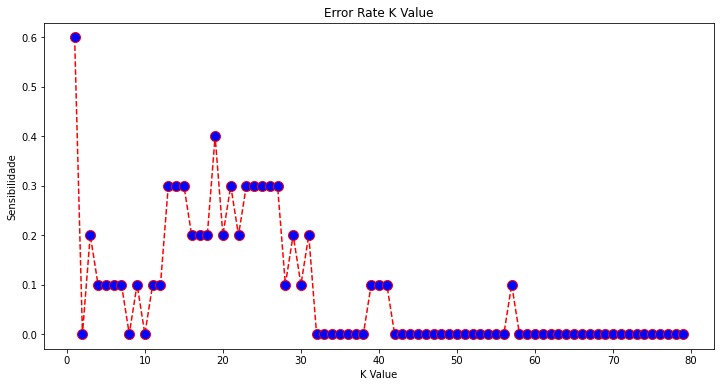

In [41]:
# Gráfico Sensibilidade
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), sensibilidade, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Sensibilidade')  
plt.show()

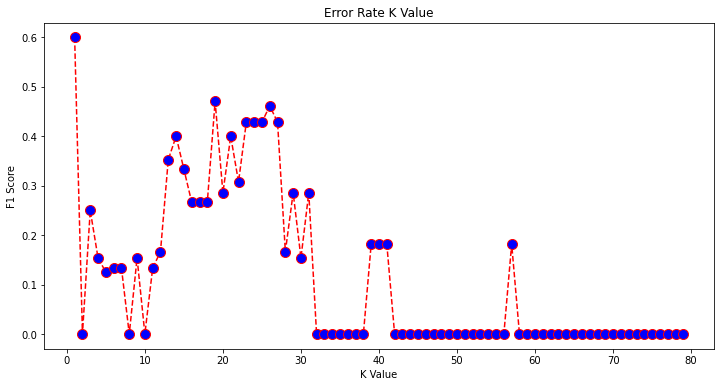

In [43]:
# Gráfico F1 Score
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), f1Score, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score')  
plt.show()